In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', 25)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Link 1: 1001 - 401

In [2]:
link1 = pd.read_excel('/kaggle/input/fabriclink/Fablink_cleaned.xlsx', sheet_name = 'Fab1001-401',
                      parse_dates = ['datetime'])
link1['datetime'] = link1['datetime'].dt.strftime('%Y-%m-%d')
link1['datetime'] = pd.to_datetime(link1['datetime'], yearfirst = True)
print('Times are now of data type:', link1['datetime'].dtype)

# Bring `datetime` column to first_place
datetime = link1.pop('datetime')
link1.insert(0, 'Timestamp', datetime)

link1

Times are now of data type: datetime64[ns]


,Timestamp,source_node,source_port,source_type,operSpeed,destination_node,destination_port,destination_type,octets,lastOctetval,Octet-diff,Utilization
0,2022-05-13,1001,1/1,spine,40G,401,1/49,leaf,864504425592799,859365645174667,5138780418132,453.770639
1,2022-05-14,1001,1/1,spine,40G,401,1/49,leaf,869309684178755,864504425592799,4805258585956,424.319602
2,2022-05-15,1001,1/1,spine,40G,401,1/49,leaf,874373310562711,869309684178755,5063626383956,447.134299
3,2022-05-16,1001,1/1,spine,40G,401,1/49,leaf,879933845908609,874373310562711,5560535345898,491.012939
4,2022-05-17,1001,1/1,spine,40G,401,1/49,leaf,885694021578201,879933845908609,5760175669592,508.641814
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022-07-20,1001,1/1,spine,40G,401,1/49,leaf,1412208475356408,1402832953991526,9375521364882,827.888327
66,2022-07-21,1001,1/1,spine,40G,401,1/49,leaf,1423002959086347,1412208475356408,10794483729939,953.187212
67,2022-07-22,1001,1/1,spine,40G,401,1/49,leaf,1432188598713429,1423002959086347,9185639627082,811.121166
68,2022-07-23,1001,1/1,spine,40G,401,1/49,leaf,1441509053549386,1432188598713429,9320454835957,823.025777


In [3]:
# Create days_passed column
base_date = link1['Timestamp'].iloc[0]
link1['days_passed'] = (link1['Timestamp'] - base_date).dt.days
link1

,Timestamp,source_node,source_port,source_type,operSpeed,destination_node,destination_port,destination_type,octets,lastOctetval,Octet-diff,Utilization,days_passed
0,2022-05-13,1001,1/1,spine,40G,401,1/49,leaf,864504425592799,859365645174667,5138780418132,453.770639,0
1,2022-05-14,1001,1/1,spine,40G,401,1/49,leaf,869309684178755,864504425592799,4805258585956,424.319602,1
2,2022-05-15,1001,1/1,spine,40G,401,1/49,leaf,874373310562711,869309684178755,5063626383956,447.134299,2
3,2022-05-16,1001,1/1,spine,40G,401,1/49,leaf,879933845908609,874373310562711,5560535345898,491.012939,3
4,2022-05-17,1001,1/1,spine,40G,401,1/49,leaf,885694021578201,879933845908609,5760175669592,508.641814,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022-07-20,1001,1/1,spine,40G,401,1/49,leaf,1412208475356408,1402832953991526,9375521364882,827.888327,68
66,2022-07-21,1001,1/1,spine,40G,401,1/49,leaf,1423002959086347,1412208475356408,10794483729939,953.187212,69
67,2022-07-22,1001,1/1,spine,40G,401,1/49,leaf,1432188598713429,1423002959086347,9185639627082,811.121166,70
68,2022-07-23,1001,1/1,spine,40G,401,1/49,leaf,1441509053549386,1432188598713429,9320454835957,823.025777,71


Equation of line: Util = 3.878 * Days_passed + 607.649

Mean squared Error: 4963.3907
R2 score: 0.5667



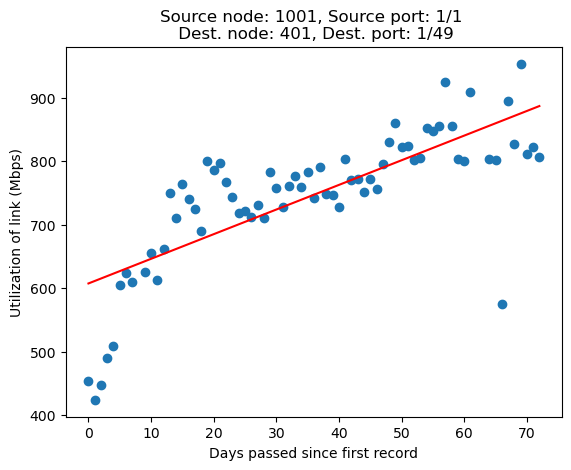

In [4]:
X, y = link1[['days_passed']], link1['Utilization']

# Create a LinearRegression Object
reg = LinearRegression().fit(X, y)
# Print the equation of the line
print('Equation of line: Util = {:.3f} * Days_passed + {:.3f}\n'.format(reg.coef_[0], reg.intercept_))

# Calculate mean squared error
y_pred = reg.predict(X)
print('Mean squared Error: {:.4f}'.format(mean_squared_error(y, y_pred)))
print('R2 score: {:.4f}\n'.format(r2_score(y, y_pred)))

# Create scatter plot of line of best fit with the data
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'red')
plt.xlabel('Days passed since first record')
plt.ylabel('Utilization of link (Mbps)')
plt.title('Source node: 1001, Source port: 1/1 \n Dest. node: 401, Dest. port: 1/49')

# Save the figure before displaying it
# save_as = str(name[0]) + '-' + str(name[2]) + '.jpg'
# plt.savefig('/kaggle/working/' + save_as)

plt.show()

### Link 2: 1002 - 401

In [5]:
link2 = pd.read_excel('/kaggle/input/fabriclink/Fablink_cleaned.xlsx', sheet_name = 'Fab1002-401',
                      parse_dates = ['datetime'])
link2['datetime'] = link2['datetime'].dt.strftime('%Y-%m-%d')
link2['datetime'] = pd.to_datetime(link2['datetime'], yearfirst = True)
print('Times are now of data type:', link2['datetime'].dtype)

# Bring `datetime` column to first_place
datetime = link2.pop('datetime')
link2.insert(0, 'Timestamp', datetime)

link2

Times are now of data type: datetime64[ns]


,Timestamp,source_node,source_port,source_type,operSpeed,destination_node,destination_port,destination_type,octets,lastOctetval,Octet-diff,Utilization
0,2022-05-13,1002,1/1,spine,40G,401,1/50,leaf,1294836545844876,1288534668453794,6301877391082,556.475798
1,2022-05-14,1002,1/1,spine,40G,401,1/50,leaf,1300783379663988,1294836545844876,5946833819112,525.124322
2,2022-05-15,1002,1/1,spine,40G,401,1/50,leaf,1305281270436508,1300783379663988,4497890772520,397.178047
3,2022-05-16,1002,1/1,spine,40G,401,1/50,leaf,1310806346359800,1305281270436508,5525075923292,487.881760
4,2022-05-17,1002,1/1,spine,40G,401,1/50,leaf,1316036666713584,1310806346359800,5230320353784,461.853906
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022-07-20,1002,1/1,spine,40G,401,1/50,leaf,1833504005854302,1824923057568610,8580948285692,757.724999
66,2022-07-21,1002,1/1,spine,40G,401,1/50,leaf,1842592314670839,1833504005854302,9088308816537,802.526546
67,2022-07-22,1002,1/1,spine,40G,401,1/50,leaf,1851719576454517,1842592314670839,9127261783678,805.966217
68,2022-07-23,1002,1/1,spine,40G,401,1/50,leaf,1863801252626455,1851719576454517,12081676171938,1066.850395


In [6]:
# Create days_passed column
base_date = link2['Timestamp'].iloc[0]
link2['days_passed'] = (link2['Timestamp'] - base_date).dt.days
link2

,Timestamp,source_node,source_port,source_type,operSpeed,destination_node,destination_port,destination_type,octets,lastOctetval,Octet-diff,Utilization,days_passed
0,2022-05-13,1002,1/1,spine,40G,401,1/50,leaf,1294836545844876,1288534668453794,6301877391082,556.475798,0
1,2022-05-14,1002,1/1,spine,40G,401,1/50,leaf,1300783379663988,1294836545844876,5946833819112,525.124322,1
2,2022-05-15,1002,1/1,spine,40G,401,1/50,leaf,1305281270436508,1300783379663988,4497890772520,397.178047,2
3,2022-05-16,1002,1/1,spine,40G,401,1/50,leaf,1310806346359800,1305281270436508,5525075923292,487.881760,3
4,2022-05-17,1002,1/1,spine,40G,401,1/50,leaf,1316036666713584,1310806346359800,5230320353784,461.853906,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022-07-20,1002,1/1,spine,40G,401,1/50,leaf,1833504005854302,1824923057568610,8580948285692,757.724999,68
66,2022-07-21,1002,1/1,spine,40G,401,1/50,leaf,1842592314670839,1833504005854302,9088308816537,802.526546,69
67,2022-07-22,1002,1/1,spine,40G,401,1/50,leaf,1851719576454517,1842592314670839,9127261783678,805.966217,70
68,2022-07-23,1002,1/1,spine,40G,401,1/50,leaf,1863801252626455,1851719576454517,12081676171938,1066.850395,71


Equation of line: Util = 4.279 * Days_passed + 585.625

Mean squared Error: 8857.7699
R2 score: 0.4715



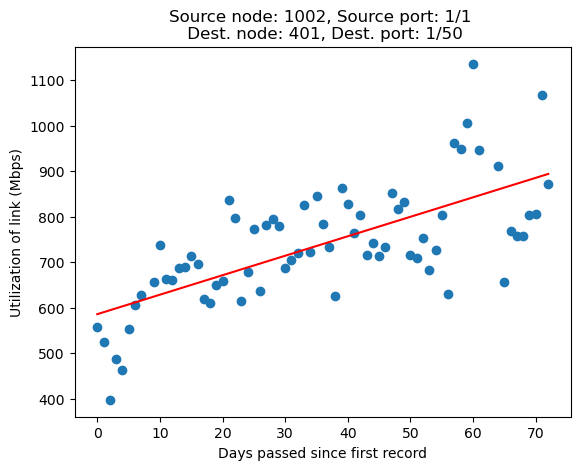

In [7]:
X, y = link2[['days_passed']], link2['Utilization']

# Create a LinearRegression Object
reg = LinearRegression().fit(X, y)
# Print the equation of the line
print('Equation of line: Util = {:.3f} * Days_passed + {:.3f}\n'.format(reg.coef_[0], reg.intercept_))

# Calculate mean squared error
y_pred = reg.predict(X)
print('Mean squared Error: {:.4f}'.format(mean_squared_error(y, y_pred)))
print('R2 score: {:.4f}\n'.format(r2_score(y, y_pred)))

# Create scatter plot of line of best fit with the data
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'red')
plt.xlabel('Days passed since first record')
plt.ylabel('Utilization of link (Mbps)')
plt.title('Source node: 1002, Source port: 1/1 \n Dest. node: 401, Dest. port: 1/50')

# Save the figure before displaying it
# save_as = str(name[0]) + '-' + str(name[2]) + '.jpg'
# plt.savefig('/kaggle/working/' + save_as)

plt.show()